### Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

# Read CSV file


In [2]:
ds=pd.read_csv('bank.csv')

In [3]:
ds.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
ds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
ds['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [6]:
ds.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [7]:
ds.default.unique()

array(['no', 'yes'], dtype=object)

### Select all features except the target feature

In [8]:
X=ds.loc[:,ds.columns !='default']

In [9]:
X.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Select Only the target feature

In [10]:
y=ds.loc[:,ds.columns=='default']

In [11]:
y.head(5)

,default
0,no
1,no
2,no
3,no
4,no


### Select Only Contineous Values from X 

In [12]:
numerical_feature=X.iloc[:,[4,8,10,11,12,13]]

In [13]:
numerical_feature.head(5)

,balance,day,duration,campaign,pdays,previous
0,2343,5,1042,1,-1,0
1,45,5,1467,1,-1,0
2,1270,5,1389,1,-1,0
3,2476,5,579,1,-1,0
4,184,5,673,2,-1,0


### Select Only Categorical Values from X and y groups to apply LabelEncoder and OneHotEncoder

In [14]:
#X_contineous_mask=X.columns[X_contineous_mask].tolist()

In [15]:
#X_contineous_mask

In [16]:
X_categorical_mask=X.dtypes==object

In [17]:
X_categorical_cols=X.columns[X_categorical_mask].tolist()

In [18]:
X[X_categorical_cols].head()

,job,marital,education,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,unknown,may,unknown,yes
2,technician,married,secondary,yes,no,unknown,may,unknown,yes
3,services,married,secondary,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,unknown,may,unknown,yes


### Create Object of LabelEncoder

In [19]:
le=LabelEncoder()

In [49]:
#Convert all the categorical columns to numeric values
X[X_categorical_cols]=X[X_categorical_cols].apply(lambda loc:le.fit_transform(loc))

In [21]:
X[X_categorical_cols].head()

,job,marital,education,housing,loan,contact,month,poutcome,deposit
0,0,1,1,1,0,2,8,3,1
1,0,1,1,0,0,2,8,3,1
2,9,1,1,1,0,2,8,3,1
3,7,1,1,1,0,2,8,3,1
4,0,1,2,0,0,2,8,3,1


In [22]:
X1=X[X_categorical_cols]

In [51]:
y=le.fit_transform(y)

In [24]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
y=pd.DataFrame({'default':y})

In [26]:
type(y)

pandas.core.frame.DataFrame

In [27]:
y.head(2)

,default
0,0
1,0


### Use Of One Hot Encoder

In [28]:
ohe=OneHotEncoder(categorical_features=X_categorical_mask,sparse=False)

In [65]:
Categ_cols=ohe.fit_transform(X)

C:\Users\akumar4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [30]:
Categ_cols.shape

(11162, 51)

In [31]:
Categ_cols=pd.DataFrame(data=Categ_cols)

In [32]:
Categ_cols.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,59.0,2343.0,5.0,1042.0,1.0,-1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,56.0,45.0,5.0,1467.0,1.0,-1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,41.0,1270.0,5.0,1389.0,1.0,-1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,55.0,2476.0,5.0,579.0,1.0,-1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,54.0,184.0,5.0,673.0,2.0,-1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,42.0,0.0,5.0,562.0,2.0,-1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,56.0,830.0,6.0,1201.0,1.0,-1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,60.0,545.0,6.0,1030.0,1.0,-1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,37.0,1.0,6.0,608.0,1.0,-1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,28.0,5090.0,6.0,1297.0,3.0,-1.0,0.0


### Concat Numerical(Contineous) and Categorical dataframes

In [33]:
X_Final=pd.concat([numerical_feature,Categ_cols],axis=1)

In [34]:
X_Final.head(5)

,balance,day,duration,campaign,pdays,previous,0,1,2,3,...,41,42,43,44,45,46,47,48,49,50
0,2343,5,1042,1,-1,0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,59.0,2343.0,5.0,1042.0,1.0,-1.0,0.0
1,45,5,1467,1,-1,0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,56.0,45.0,5.0,1467.0,1.0,-1.0,0.0
2,1270,5,1389,1,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,41.0,1270.0,5.0,1389.0,1.0,-1.0,0.0
3,2476,5,579,1,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,55.0,2476.0,5.0,579.0,1.0,-1.0,0.0
4,184,5,673,2,-1,0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,54.0,184.0,5.0,673.0,2.0,-1.0,0.0


In [35]:
y.head(5)

,default
0,0
1,0
2,0
3,0
4,0


### Train_Test_Split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_Final,y,test_size=0.25,random_state=22)

### Decision Tree Classifier

In [37]:
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

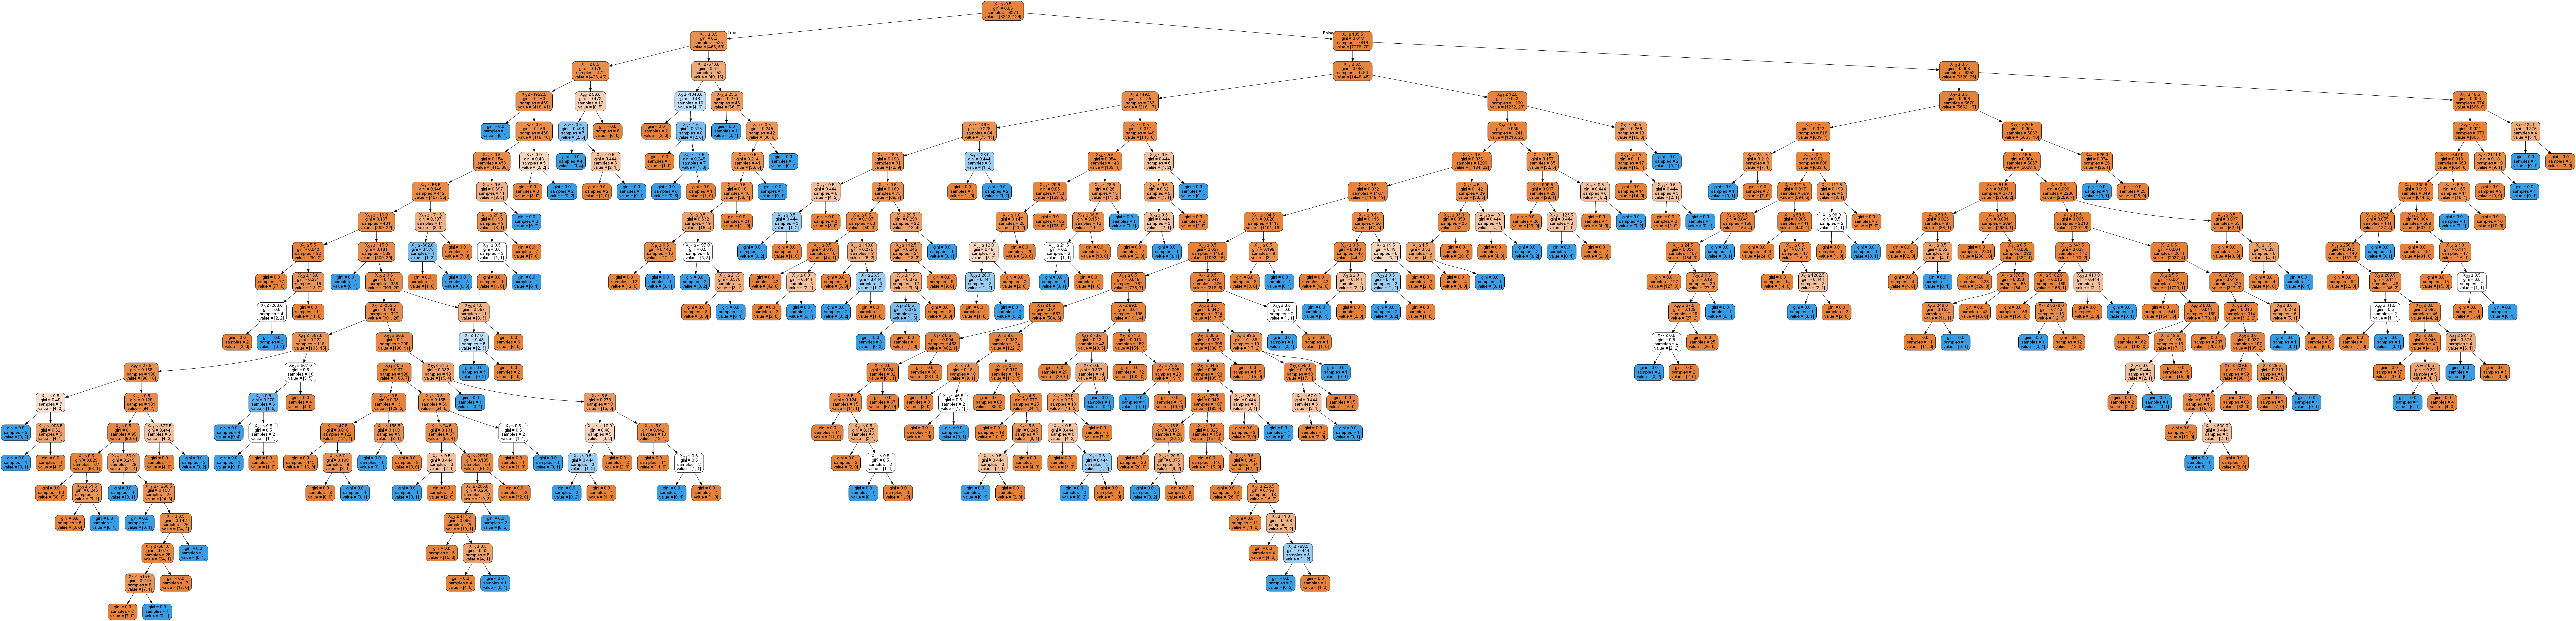

In [38]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
y_pred=dt.predict(X_test)

In [40]:
len(y_pred)

2791

In [41]:
len(y_test)

2791

### Accuracy of the Model

In [42]:
accur=accuracy_score(y_test,y_pred)

In [43]:
accur

0.9731279111429595

### Confusion Matrix

In [44]:
confusion_matrix(y_test,y_pred)

array([[2710,   42],
       [  33,    6]], dtype=int64)

In [45]:
precision=(2714)/(2714+28)

In [46]:
print(precision)

0.9897884755652808


### Classification Report

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2752
           1       0.12      0.15      0.14        39

   micro avg       0.97      0.97      0.97      2791
   macro avg       0.56      0.57      0.56      2791
weighted avg       0.98      0.97      0.97      2791

